In [2]:
#Setting up
%pip -q install pycaret skimpy numpy pydotplus graphviz

Note: you may need to restart the kernel to use updated packages.


In [17]:
# preparing
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skimpy as sk 
import pydotplus
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score, roc_curve
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from pycaret.classification import *


# Load data
df = pd.read_csv('data/pulsar_data_train.csv')

sk.skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 12528  │ │ float64     │ 9     │                                                          │
│ │ Number of columns │ 9      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name        ┃ NA   ┃ NA %  ┃ mean    ┃ sd     ┃ p0     ┃ p25     ┃ p50    ┃ p75    ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │  Mean of the       │    0 │     0 │     111 │  25.67 │  5.812 │   100.9 │  115.2 │  127.1 │ 189.7 │   ▂▇▃  │  │
│ │ integrated profile │      │       │         │        │        │         │        │        │       │        │  │
│ │  Standard          │    0 │     0 │   46.52 │  6.801 │  24.77 │   42.36 │  46.93 │  50.98 │ 91.81 │  ▁▇▇   │  │
│ │ deviation of the   │      │       │         │        │        │         │        │        │       │        │  │
│ │ integrated profile │      │       │         │        │        │         │        │        │       │        │  │
│ │  Excess kurtosis   │ 1735 │ 13.85 │  0.4785 │  1.065 │ -1.738 │ 0.02465 │ 0.2237 │ 0.4731 │  8.07 │   ▁▇   │  │
│ │ of the integrated  │      │       │         │        │        │         │        │        │       │        │  │
│ │ profile            │      │       │         │        │        │         │        │        │       │        │  │
│ │  Skewness of the   │    0 │     0 │   1.778 │  6.208 │ -1.792 │ -0.1881 │ 0.2033 │ 0.9324 │  68.1 │   ▇    │  │
│ │ integrated profile │      │       │         │        │        │         │        │        │       │        │  │
│ │  Mean of the       │    0 │     0 │   12.67 │  29.61 │ 0.2132 │   1.911 │  2.793 │  5.413 │ 222.4 │   ▇    │  │
│ │ DM-SNR curve       │      │       │         │        │        │         │        │        │       │        │  │
│ │  Standard          │ 1178 │   9.4 │   26.35 │  19.61 │   7.37 │    14.4 │  18.41 │  28.34 │ 110.6 │  ▇▂▁▁  │  │
│ │ deviation of the   │      │       │         │        │        │         │        │        │       │        │  │
│ │ DM-SNR curve       │      │       │         │        │        │         │        │        │       │        │  │
│ │  Excess kurtosis   │    0 │     0 │   8.333 │  4.536 │ -3.139 │   5.803 │  8.451 │  10.73 │ 34.54 │  ▂▇▅▁  │  │
│ │ of the DM-SNR      │      │       │         │        │        │         │        │        │       │        │  │
│ │ curve              │      │       │         │        │        │         │        │        │       │        │  │
│ │  Skewness of the   │  625 │  4.99 │   105.5 │  107.4 │ -1.977 │    35.2 │  83.13 │    140 │  1191 │   ▇▁   │  │
│ │ DM-SNR curve       │      │       │         │        │        │         │        │        │       │        │  │
│ │ target_class       │    0 │     0 │ 0.09203 │ 0.2891 │      0 │       0 │      0 │      0 │     1 │ ▇    ▁ │  │
│ └────────────────────┴──────┴───────┴─────────┴────────┴────────┴─────────┴────────┴────────┴───────┴────────┘  │
╰────────────────────────────────────────────────────── 

In [18]:
# Check for missing values
print(df.info())
df.T.apply(lambda x: x.unique(), axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB
None


 Mean of the integrated profile                  [121.15625, 76.96875, 130.5859375, 156.3984375...
 Standard deviation of the integrated profile    [48.37297113, 36.17555664, 53.22953353, 48.865...
 Excess kurtosis of the integrated profile       [0.375484665, 0.71289786, 0.133408289, -0.2159...
 Skewness of the integrated profile              [-0.0131654889999999, 3.3887185630000003, -0.2...
 Mean of the DM-SNR curve                        [3.168896321, 2.399665552, 2.743311037, 17.471...
 Standard deviation of the DM-SNR curve          [18.399366600000004, 17.57099693, 22.36255299,...
 Excess kurtosis of the DM-SNR curve             [7.449874148999999, 9.414652256, 8.508363784, ...
 Skewness of the DM-SNR curve                    [65.15929771, 102.7229747, 74.03132420000001, ...
target_class                                                                            [0.0, 1.0]
dtype: object

<Axes: title={'center': 'Heatmap showing Correlation between all the features'}>

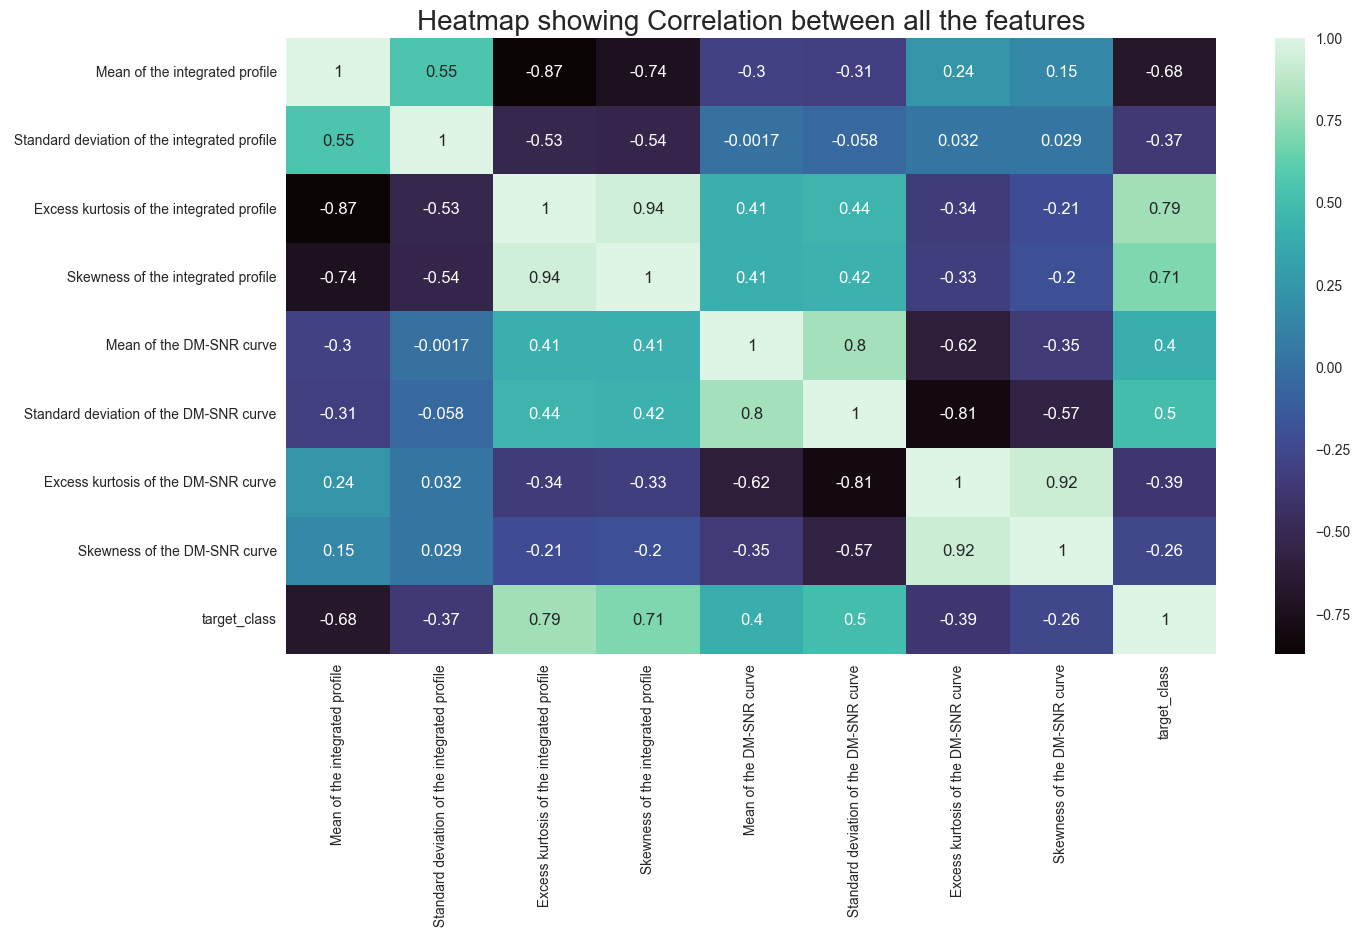

In [19]:
plt.figure(figsize=(15,8))
plt.title("Heatmap showing Correlation between all the features", fontsize=20)
sns.heatmap(df.corr(),annot = True, cmap='mako')

In [20]:
df.columns = df.columns.str.strip().str.replace('\xa0', ' ').str.replace('\u200b', '')
df.columns = df.columns.str.translate(str.maketrans('', '', '\t\n\r\x0b\x0c'))
df.columns = df.columns.str.replace(r'\s+', '')


df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [21]:
df.isnull().sum()

Mean of the integrated profile                     0
Standard deviation of the integrated profile       0
Excess kurtosis of the integrated profile       1735
Skewness of the integrated profile                 0
Mean of the DM-SNR curve                           0
Standard deviation of the DM-SNR curve          1178
Excess kurtosis of the DM-SNR curve                0
Skewness of the DM-SNR curve                     625
target_class                                       0
dtype: int64

In [22]:
#   #Imputer        #Use Case               #Encoding   #Type               #Strategy
#   SimpleImputer   Numerical missing       values      No encoding         Mean, median, most frequent, constant
#   KNNImputer      Numerical missing       values      No encoding         Mean or median of nearest neighbors
#   OrdinalEncoder  Ordinal categorical     variables	Ordinal encoding	Integer values based on order
#   OneHotEncoder   Nominal categorical     variables	One-hot encoding	Binary features
#   LabelEncoder    Nominal categorical     variables   Label encoding      Unique integer values
#df.fillna(np.nan,inplace=True)

# Impute missing values using simple
#imputer = SimpleImputer(strategy='mean')
#df['standard_d_1'] = imputer.fit_transform(df['standard_d_1'])
#df['skewness_o_1'] = imputer.fit_transform(df['skewness_o_1'])
#df['excess_kur'] = imputer.fit_transform(df['excess_kur'])

# Use Onehot for categorical variables
#le = OneHotEncoder(handle_unknown='ignore')
#df[] = le.fit_transform(df[])
#df[] = le.fit_transform(df[])
#df[] = le.fit_transform(df[])

cols = df.columns
df[cols[2]].fillna(df[cols[2]].median(),inplace=True)
df[cols[5]].fillna(df[cols[5]].median(),inplace=True)
df[cols[2]].fillna(df[cols[-2]].median(),inplace=True)

df.dropna(inplace=True)
df.isnull().sum()


Mean of the integrated profile                  0
Standard deviation of the integrated profile    0
Excess kurtosis of the integrated profile       0
Skewness of the integrated profile              0
Mean of the DM-SNR curve                        0
Standard deviation of the DM-SNR curve          0
Excess kurtosis of the DM-SNR curve             0
Skewness of the DM-SNR curve                    0
target_class                                    0
dtype: int64

In [23]:
# Split data into training and testing sets
X = df.drop('target_class', axis=1)
y = df['target_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [30]:
# Pipeline definition remains the same
pipe = Pipeline(steps=[
    ('pca', PCA(n_components=5)),
    ('classifier', SVC())
])

# Hyperparameter grid for support vector
pipe_params = {
    'classifier__kernel': ['linear', 'rbf'],
    'classifier__C': [0.1, 1, 10],
    'classifier__gamma': [0.1, 1, 10]
}

# Use RandomizedSearchCV instead of GridSearchCV
random_search = RandomizedSearchCV(pipe, pipe_params, cv=5, n_iter=100)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('pca', PCA(n_components=5)),
                                             ('classifier', SVC())]),
                   n_iter=100,
                   param_distributions={'classifier__C': [0.1, 1, 10],
                                        'classifier__gamma': [0.1, 1, 10],
                                        'classifier__kernel': ['linear',
                                                               'rbf']})

In [36]:
#best para
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters:")
for param_name, param_value in best_params.items():
    print(f"  {param_name}: {param_value}")

# Print the model configuration
print("\nBest Model Configuration:")
print(best_model)

Best Parameters:
  classifier__kernel: rbf
  classifier__gamma: 0.1
  classifier__C: 1

Best Model Configuration:
Pipeline(steps=[('pca', PCA(n_components=5)),
                ('classifier', SVC(C=1, gamma=0.1))])


In [37]:
# Evaluate performance using appropriate metrics
y_pred = best_model.predict(X_test)


In [38]:
# Model Accuracy, how often is the classifier correct?
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9748005039899202


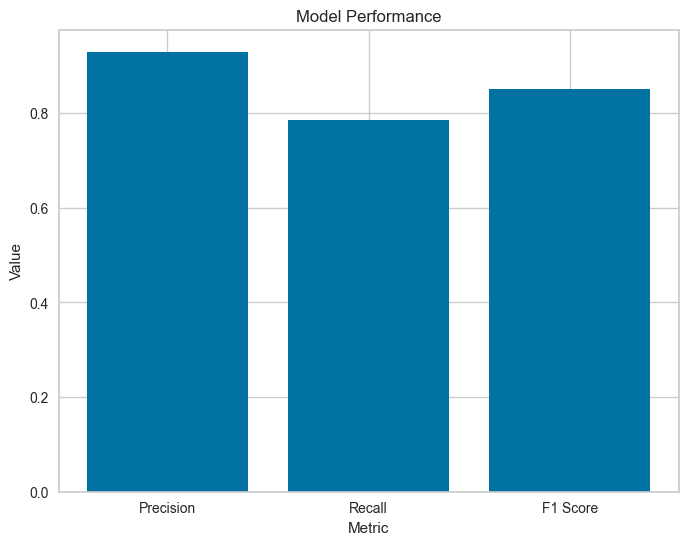

In [39]:
# Plot the precision, recall, and F1 score
plt.figure(figsize=(8,6))
plt.bar(['Precision', 'Recall', 'F1 Score'], [precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)])
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Model Performance')
plt.show()


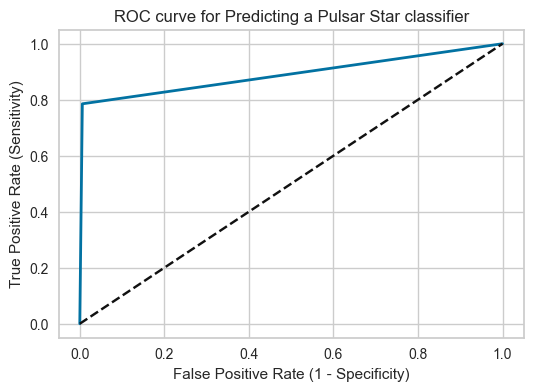

In [40]:
# plot ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a Pulsar Star classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()